# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import itertools

In [2]:
from MFLUSolution import *

In [3]:
from selection_and_operators.mutation import swap_stages_slots_mutation, inversion_mutation, shuffle_mutation
from selection_and_operators.crossover import cycle_crossover, partially_matched_crossover, swap_time_slots_crossover
from selection_and_operators.selection import tournament_selection
from library.algorithm import *

In [4]:
from experiment import *

# 2. Genetic Algorithms

Baseline parameters:
- POP_SIZE = 50, 
- CROSSOVER_FUNCTION = cycle_crossover,
- MUTATION_FUNCTION = shuffle_mutation,
- NUMBER_OF_TESTS=30,
- MAX_GEN=100,
- S_RANKING_SELECTION=1.5,
- K_TOURNEMENT_SELECTION=5,
- SELECTION_ALGORITHM=tournament_selection,
- XO_PROB=0.9,
- MUT_PROB=0.4,
- MUT_MAX_WINDOW_SIZE=5, 
- ELITISM = True,
- VERBOSE = False

### 1st test - crossover and mutation operators:

Operators to test:

- Mutation: swap_slots_mutation, inversion_mutation, shuffle_mutation
- Crossover: cycle_crossover, partially_matched_crossover, swap_time_slots_crossover

In [16]:
MAX_GEN=5
NUMBER_OF_TESTS=1

In [17]:
grid_params = {
    "crossover": [
        {
            "function": partially_matched_crossover,
            "xo_prob": 0.8
        },
        {
            "function": swap_time_slots_crossover,
            "xo_prob": 0.8
        }
    ],
    "mutation": [
        {
            "function": swap_stages_slots_mutation,
            "mut_prob": 0.6
        },
        {
            "function": inversion_mutation,
            "mut_prob": 0.2
        },

        {
            "function": shuffle_mutation,
            "mut_prob": 0.2
        }


    ],
    "elitism": [True, False]
}

In [18]:
all_results_test1=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs = {}

for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"{mutation_function.__name__}{mut_prob}__{crossover_function.__name__}{xo_prob}__{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")
    
    result = run_experiment_ga(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS
    )
    all_results_test1.append(result)
    fitness_dfs[experiment_name] = result['df']




Running experiment: swap_stages_slots_mutation0.6__partially_matched_crossover0.8__True

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6981364631238374
Final best individual in generation 2: 0.6981364631238374
Final best individual in generation 3: 0.7133479335905134
Final best individual in generation 4: 0.7273786361835374
Final best individual in generation 5: 0.7411687170763215


Running experiment: swap_stages_slots_mutation0.6__partially_matched_crossover0.8__False

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6700272849611714
Final best individual in generation 2: 0.6935386832825222
Final best individual in generation 3: 0.6948675394922859
Final best individual in generation 4: 0.7087203533450998
Final best individual in generation 5: 0.7214742660990124


Running experiment: inversion_mutation0.2__partially_matched_crossover0.8__True

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0

In [22]:
fitness_dfs

{'swap_stages_slots_mutation0.6__partially_matched_crossover0.8__True':           0         1         2         3         4
 0  0.698136  0.698136  0.713348  0.727379  0.741169,
 'swap_stages_slots_mutation0.6__partially_matched_crossover0.8__False':           0         1         2        3         4
 0  0.670027  0.693539  0.694868  0.70872  0.721474,
 'inversion_mutation0.2__partially_matched_crossover0.8__True':           0         1         2         3         4
 0  0.681561  0.681561  0.709497  0.719772  0.720888,
 'inversion_mutation0.2__partially_matched_crossover0.8__False':           0         1         2         3         4
 0  0.734291  0.740522  0.740833  0.741767  0.751602,
 'shuffle_mutation0.2__partially_matched_crossover0.8__True':           0         1         2         3         4
 0  0.674152  0.688025  0.688025  0.709826  0.709826,
 'shuffle_mutation0.2__partially_matched_crossover0.8__False':           0         1         2         3         4
 0  0.681448  0.69686

In [25]:
def plot_avg_median_fit_per_generation(results_dict):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import MaxNLocator

    experiments = list(fitness_dfs.keys())
    num_experiments = len(experiments)

    colors = [
        '#1f77b4', '#2ca02c', '#ff7f0e',
        '#9467bd', '#8c564b', '#17becf',
        '#e377c2', '#7f7f7f', '#bcbd22',
        '#aec7e8', '#98df8a', '#ffbb78'
    ]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    for i, (exp_name, df) in enumerate(fitness_dfs.items()):
        color = colors[i % len(colors)]
        label = f"{i+1}: {exp_name}"

        # Transpor para trabalhar com colunas = gerações
        df_t = df.T

        # Calcular estatísticas por geração
        avg = df_t.mean(axis=1)
        std = df_t.std(axis=1)
        med = df_t.median(axis=1)
        generations = df_t.index

        # Plot média + std
        ax1.plot(generations, avg, label=label, color=color, linewidth=2)
        ax1.fill_between(generations, avg - std, avg + std, color=color, alpha=0.2)

        # Plot mediana
        ax2.plot(generations, med, label=label, color=color, linewidth=2)

    # Estética
    for ax, title in zip((ax1, ax2), ("Average Fitness per Generation", "Median Fitness per Generation")):
        ax.set_title(title, fontsize=13, weight='bold')
        ax.set_xlabel("Generation")
        ax.set_xlim(0, MAX_GEN)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax1.set_ylabel("Fitness")

    # Legenda
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.18), ncol=2, fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()


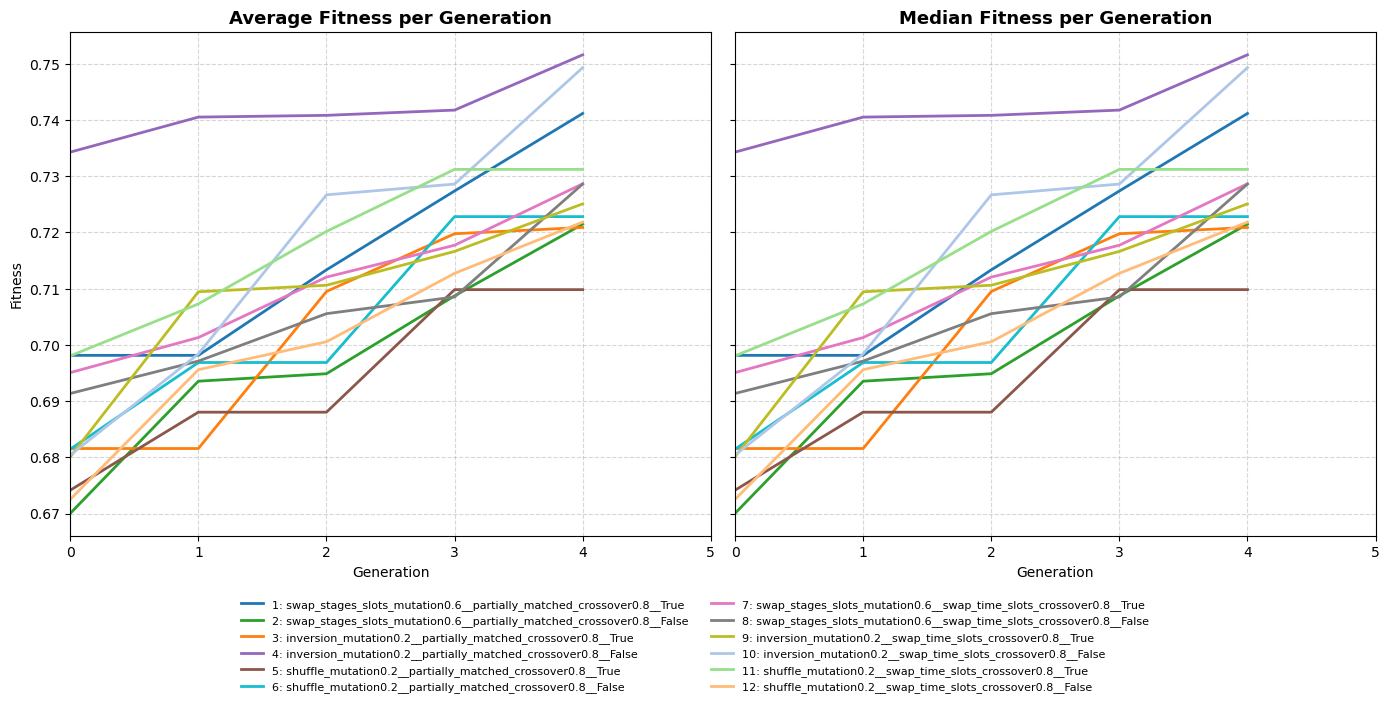

In [26]:
plot_avg_median_fit_per_generation(fitness_dfs)

In [30]:
def boxplots_final_fitness(results_input):
    import matplotlib.pyplot as plt

    operator_names = []
    final_fitness_by_experiment = []

    # Detecta se é um dict de DataFrames
    if isinstance(results_input, dict):
        for name, df in results_input.items():
            # Caso só haja 1 linha, não precisa de .T
            df_t = df if df.shape[0] > 1 else df.T
            final_fitness = df_t.iloc[:, -1].values
            final_fitness_by_experiment.append(final_fitness)
            operator_names.append(name)
    else:
        raise ValueError("This version only supports a dict of DataFrames like `fitness_dfs`.")

    # Boxplot
    plt.figure(figsize=(12, 6))
    positions = list(range(1, len(operator_names) + 1))
    box = plt.boxplot(final_fitness_by_experiment, patch_artist=True, positions=positions,
                      medianprops=dict(color='black'))


    plt.xticks(positions, labels=[str(i) for i in positions], fontsize=10)
    plt.xlabel("Experiment number", fontsize=12)
    plt.ylabel("Final Fitness", fontsize=12)
    plt.title("Final Fitness Distribution per Operator Combination", fontsize=14, weight='bold')

    # Legenda
    for i, name in enumerate(operator_names, start=1):
        plt.plot([], [], label=f"{i}: {name}", color=colors[(i - 1) % len(colors)])
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.18), fontsize=9, ncol=2, frameon=False)

    plt.tight_layout()
    plt.show()


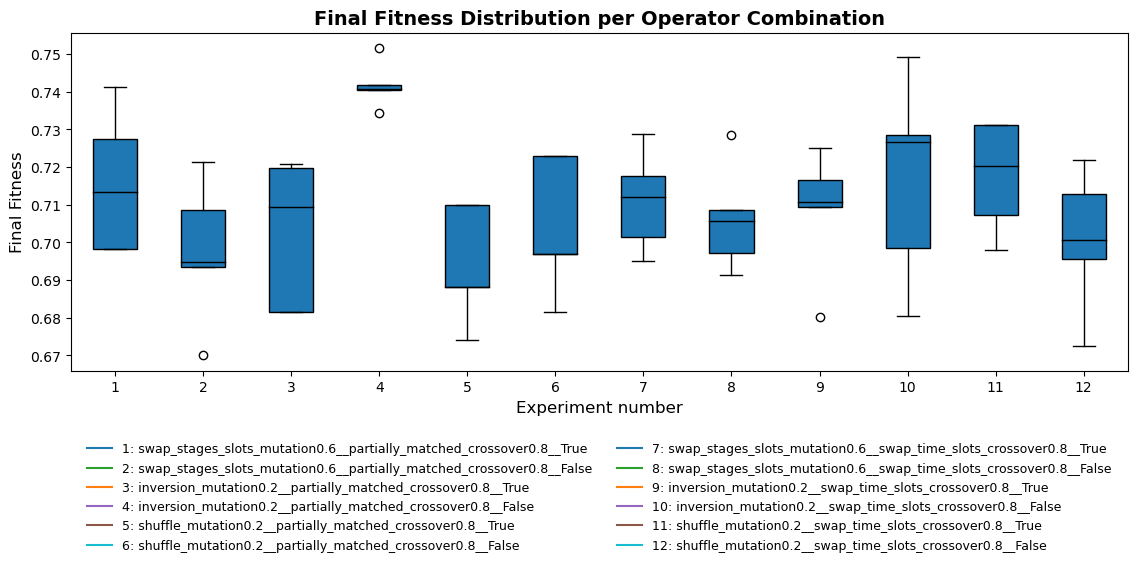

In [31]:
boxplots_final_fitness(fitness_dfs)

In [32]:
def plot_mean_std_error(all_results):
    import matplotlib.pyplot as plt

    final_means = []
    final_stds = []
    operator_names = []

    for result in all_results:
        df = result['stats_df']
        last_row = df.iloc[-1]
        mean = last_row['Fitness_Mean']
        std = last_row['Fitness_Std']

        final_means.append(mean)
        final_stds.append(std)
        operator_names.append(result['name'])

    # Posições no eixo x
    x_pos = list(range(1, len(operator_names) + 1))

    plt.figure(figsize=(10, 6))
    for i, (x, mean, std) in enumerate(zip(x_pos, final_means, final_stds)):
        plt.errorbar(x, mean, yerr=std, fmt='o', capsize=5, markersize=6,
                     linestyle='None', color='tab:blue', linewidth=2)

    plt.xticks(x_pos, rotation=45, ha='right', fontsize=10)
    plt.ylabel("Fitness")
    plt.title("Final Generation Fitness: Mean ± Std Dev")

    # Legenda com nomes dos operadores
    for i, name in enumerate(operator_names, start=1):
        plt.plot([], [], label=f"{i}: {name}", color='tab:blue')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fontsize=9, ncol=1, frameon=False)

    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


In [33]:
plot_mean_std_error(fitness_dfs)

TypeError: string indices must be integers, not 'str'

In [26]:
def avg_elapsed_time_table(all_results):
    data = []
    for result in all_results:
        data.append({
            "Experience Name": result['name'],
            "Elapsed Time Avg": result['elapsed_time_avg']
        })
    avg_elapsed_time = pd.DataFrame(data)
    avg_elapsed_time.index = range(1, len(all_results)+1)
    return avg_elapsed_time

In [27]:
avg_elapsed_time_table(all_results=all_results_test1)

,Experience Name,Elapsed Time Avg
1,swap_stages_slots_mutation__partially_matched_...,102.958498
2,swap_stages_slots_mutation__swap_time_slots_cr...,90.112400
3,inversion_mutation__partially_matched_crossover,110.208752
4,inversion_mutation__swap_time_slots_crossover,124.705823
5,shuffle_mutation__partially_matched_crossover,137.563769
6,shuffle_mutation__swap_time_slots_crossover,133.319225


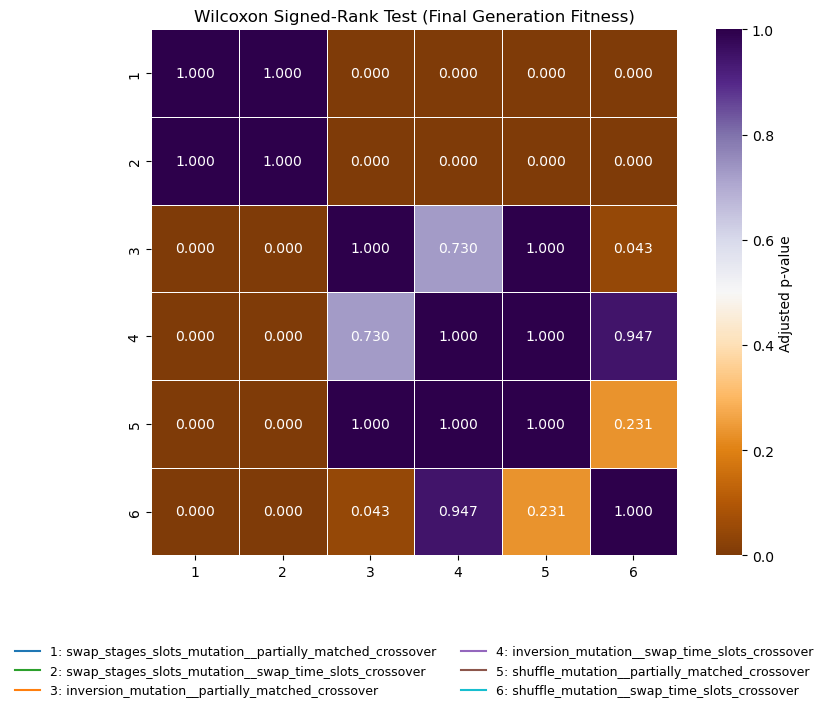

In [46]:
import numpy as np
import pandas as pd
import itertools
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Step 1: Extract last-generation fitness for each experiment
fitness_last_gen = {
    res['name']: np.array(res['fitness_array'])[:, -1]
    for res in all_results_test1
}

# Step 2: Build DataFrame for summary (average score + rank)
df = pd.DataFrame(fitness_last_gen)
avg_scores = df.mean()
avg_ranks = df.rank(axis=1, method='average').mean()

summary_df = pd.DataFrame({
    'Average Score (last gen)': avg_scores,
    'Average Rank': avg_ranks
}).sort_values(by='Average Rank')

# Step 3: Pairwise Wilcoxon tests (Holm-adjusted)
names = list(fitness_last_gen.keys())
p_values = []
pairs = []

for i, j in itertools.combinations(range(len(names)), 2):
    stat, p = wilcoxon(fitness_last_gen[names[i]], fitness_last_gen[names[j]])
    p_values.append(p)
    pairs.append((names[i], names[j]))

_, p_vals_adj, _, _ = multipletests(p_values, method='holm')

# Custom short labels
short_labels = [str(i+1) for i in range(len(names))]
name_to_label = dict(zip(names, short_labels))
label_to_name = {v: k for k, v in name_to_label.items()}

# Create p-value matrix
p_matrix_short = pd.DataFrame(
    np.ones((len(names), len(names))),
    index=short_labels,
    columns=short_labels
)

for (name_i, name_j), p in zip(pairs, p_vals_adj):
    label_i = name_to_label[name_i]
    label_j = name_to_label[name_j]
    p_matrix_short.loc[label_i, label_j] = p
    p_matrix_short.loc[label_j, label_i] = p


# Step 4: Plot heatmap with short labels
plt.figure(figsize=(8, 6))
sns.heatmap(p_matrix_short, annot=True, fmt=".3f", cmap='PuOr',
            vmin=0, vmax=1, center=0.5,
            square=True, linewidths=0.5, cbar_kws={'label': 'Adjusted p-value'})
plt.title("Wilcoxon Signed-Rank Test (Final Generation Fitness)")
plt.tight_layout()

# Add legend
#colors = sns.color_palette("hsv", len(names))
colors = [
    '#1f77b4',  # azul
    '#2ca02c',  # verde
    '#ff7f0e',  # laranja
    '#9467bd',  # roxo
    '#8c564b',  # castanho
    '#17becf'   # azul claro
]
legend_handles = [
    plt.Line2D([0], [0], color=colors[i], lw=1.5, label=f"{i+1}: {names[i]}")
    for i in range(len(names))
]
plt.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=9
)

plt.show()


### Test crossover and mutation probabilities

In [ ]:
mutation_probabilities=[random.uniform(0, 1/3), random.uniform(1/3, 2/3), random.uniform(2/3, 1)]
crossover_probabilities =[random.uniform(0, 1/3), random.uniform(1/3, 2/3), random.uniform(2/3, 1)]
mut_funct=
xo_funct=

In [ ]:
all_results_test2=[]
for mut in mutation_probabilities:
    for xo in crossover_probabilities:
        experiment_name = f"mutation_prob:{mut}__crossover_prob{xo}"
        print(f"Running experiment: {experiment_name}")
        
        result = run_experiment_ga(
            EXPERIMENT_NAME=experiment_name,
            MUT_PORB=mut,
            XO_PROB=xo,
            MUTATION_FUNCTION=mut_funct,
            CROSSOVER_FUNCTION=xo_funct,
            MAX_GEN=40,
            NUMBER_OF_TESTS=2
        )

        all_results_test2.append(result)

In [ ]:
plot_avg_median_fit_per_generation(all_results=all_results_test2)

In [ ]:
boxplots_final_fitness(all_results=all_results_test2)

In [ ]:
plot_mean_std_error(all_results=all_results_test2)

In [ ]:
avg_elapsed_time_table(all_results=all_results_test2)

# 3. Hill Climbing

In [5]:
initial_solution_hc= LUHCSolution()

In [6]:
initial_solution_hc.fitness()

0.5448506567102158

In [7]:
best_sol=hill_climbing(initial_solution=initial_solution_hc, verbose=True, maximization=True)

Current solution: [11, 9, 26, 34, 21, 16, 28]
[0, 25, 12, 29, 14, 10, 33]
[24, 19, 32, 20, 7, 31, 8]
[17, 1, 4, 27, 18, 2, 5]
[3, 13, 6, 30, 23, 15, 22] with fitness 0.5448506567102158
Neighbor: [28, 11, 9, 26, 34, 21, 16]
[0, 25, 12, 29, 14, 10, 33]
[24, 19, 32, 20, 7, 31, 8]
[17, 1, 4, 27, 18, 2, 5]
[3, 13, 6, 30, 23, 15, 22] with fitness 0.5480662348816506
Neighbor: [11, 9, 26, 34, 21, 16, 28]
[33, 0, 25, 12, 29, 14, 10]
[24, 19, 32, 20, 7, 31, 8]
[17, 1, 4, 27, 18, 2, 5]
[3, 13, 6, 30, 23, 15, 22] with fitness 0.5580169999034097
Neighbor: [11, 9, 26, 34, 21, 16, 28]
[0, 25, 12, 29, 14, 10, 33]
[8, 24, 19, 32, 20, 7, 31]
[17, 1, 4, 27, 18, 2, 5]
[3, 13, 6, 30, 23, 15, 22] with fitness 0.5250529480084717
Neighbor: [11, 9, 26, 34, 21, 16, 28]
[0, 25, 12, 29, 14, 10, 33]
[24, 19, 32, 20, 7, 31, 8]
[5, 17, 1, 4, 27, 18, 2]
[3, 13, 6, 30, 23, 15, 22] with fitness 0.5115426777051946
Neighbor: [11, 9, 26, 34, 21, 16, 28]
[0, 25, 12, 29, 14, 10, 33]
[24, 19, 32, 20, 7, 31, 8]
[17, 1, 4, 27,

In [8]:
best_sol

([[16, 28, 11, 9, 26, 34, 21], [14, 10, 33, 0, 25, 12, 29], [31, 8, 24, 19, 32, 20, 7], [17, 1, 4, 27, 18, 2, 5], [3, 13, 6, 30, 23, 15, 22]],
 [0.5580169999034097,
  0.5984516623085329,
  0.6400147636126842,
  0.646600523894581,
  0.6665219756034791,
  0.6792303680092727,
  0.6961618503200654,
  0.6961618503200654])

In [9]:
MAX_ITER=[1, 2]
NUMBER_OF_TESTS=2

In [10]:
all_results_hc=[]
for iter in MAX_ITER:
    result=run_experiment_hc(
    EXPERIMENT_NAME = f"hc_iter_{iter}",
    NUMBER_OF_TESTS=NUMBER_OF_TESTS,
    MAX_GEN=MAX_ITER,
    VERBOSE=True)
    all_results_hc.append(result)
        

Iteration 0 of the HC algorithm

Current solution: [27, 29, 24, 30, 26, 18, 10]
[9, 8, 17, 3, 22, 11, 0]
[2, 6, 32, 15, 20, 25, 16]
[23, 34, 13, 1, 14, 5, 21]
[28, 31, 19, 4, 33, 7, 12] with fitness 0.5954666924240961
Neighbor: [10, 27, 29, 24, 30, 26, 18]
[9, 8, 17, 3, 22, 11, 0]
[2, 6, 32, 15, 20, 25, 16]
[23, 34, 13, 1, 14, 5, 21]
[28, 31, 19, 4, 33, 7, 12] with fitness 0.6045248193321217
Neighbor: [27, 29, 24, 30, 26, 18, 10]
[0, 9, 8, 17, 3, 22, 11]
[2, 6, 32, 15, 20, 25, 16]
[23, 34, 13, 1, 14, 5, 21]
[28, 31, 19, 4, 33, 7, 12] with fitness 0.5811807425521373
Neighbor: [27, 29, 24, 30, 26, 18, 10]
[9, 8, 17, 3, 22, 11, 0]
[16, 2, 6, 32, 15, 20, 25]
[23, 34, 13, 1, 14, 5, 21]
[28, 31, 19, 4, 33, 7, 12] with fitness 0.6089710154618877
Neighbor: [27, 29, 24, 30, 26, 18, 10]
[9, 8, 17, 3, 22, 11, 0]
[2, 6, 32, 15, 20, 25, 16]
[21, 23, 34, 13, 1, 14, 5]
[28, 31, 19, 4, 33, 7, 12] with fitness 0.5790823915773207
Neighbor: [27, 29, 24, 30, 26, 18, 10]
[9, 8, 17, 3, 22, 11, 0]
[2, 6, 32,

In [11]:
plot_avg_median_fit_per_generation(all_results=all_results_hc)

KeyError: 'stats_df'

ValueError: List of boxplot statistics and `positions` values must have same the length

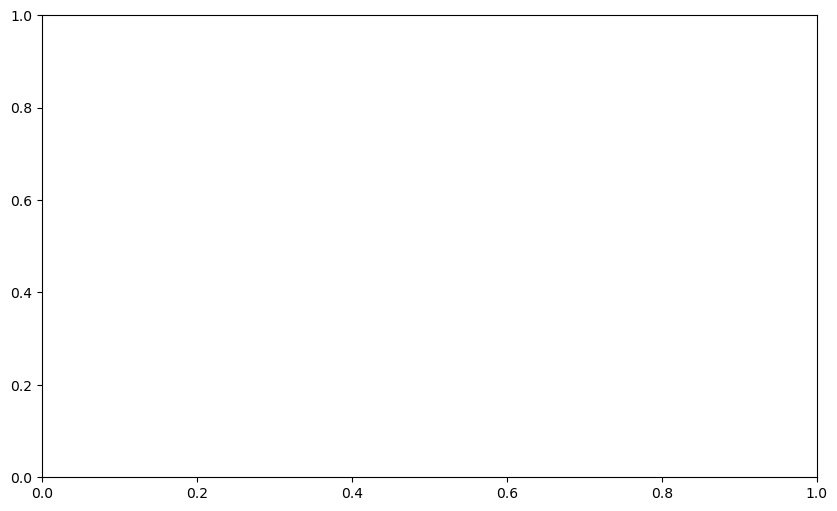

In [23]:
boxplots_final_fitness(all_results=all_results_hc)

# 4. Simulated Annealing

In [5]:
initial_solution_sa=LUSASolution()

In [6]:
MAX_ITER=2
NUMBER_OF_TESTS=2
C=[2, 2.5]
L=20
H=10

In [8]:
all_results_sa=[]
for c in C:
    result=run_experiment_sa(
    EXPERIMENT_NAME = f"sa_iter_{c}",
    NUMBER_OF_TESTS=NUMBER_OF_TESTS,
    MAX_GEN=MAX_ITER,
    C=c,
    L=L,
    H=H,
    VERBOSE=True)
    all_results_sa.append(result)

Iteration 0 of the SA algorithm

Initial solution: [[1, 17, 12, 4, 28, 32, 8], [34, 18, 21, 26, 16, 11, 29], [0, 31, 22, 7, 6, 13, 5], [20, 14, 23, 2, 33, 19, 24], [30, 27, 25, 15, 3, 10, 9]] with fitness 0.5922487221489581
Random neighbor [1, 17, 12, 4, 28, 32, 8]
[34, 18, 21, 26, 11, 16, 29]
[0, 31, 22, 7, 6, 13, 5]
[20, 14, 23, 2, 33, 19, 24]
[30, 27, 25, 15, 3, 10, 9] with fitness: 0.6085752527612031
Neighbor is better. Replaced current solution by neighbor.
New current solution [1, 17, 12, 4, 28, 32, 8]
[34, 18, 21, 26, 11, 16, 29]
[0, 31, 22, 7, 6, 13, 5]
[20, 14, 23, 2, 33, 19, 24]
[30, 27, 25, 15, 3, 10, 9] with fitness 0.6085752527612031
Random neighbor [1, 17, 12, 4, 28, 32, 8]
[34, 18, 26, 21, 11, 16, 29]
[0, 31, 22, 7, 6, 13, 5]
[20, 14, 23, 2, 33, 19, 24]
[30, 27, 25, 15, 3, 10, 9] with fitness: 0.5864327693942298
Probability of accepting worse neighbor: 0.9889898189659065
Neighbor is worse and was accepted.
New current solution [1, 17, 12, 4, 28, 32, 8]
[34, 18, 26, 21, 1

Neighbor is better. Replaced current solution by neighbor.
New current solution [1, 17, 4, 12, 28, 8, 32]
[34, 26, 18, 11, 21, 16, 29]
[31, 13, 0, 7, 22, 6, 20]
[5, 19, 23, 2, 33, 14, 30]
[24, 27, 25, 15, 3, 10, 9] with fitness 0.5803695365561491
Random neighbor [1, 17, 4, 12, 28, 8, 32]
[34, 26, 18, 11, 21, 29, 16]
[31, 13, 0, 7, 22, 6, 20]
[5, 19, 23, 2, 33, 14, 30]
[24, 27, 25, 15, 3, 10, 9] with fitness: 0.5661641491256096
Probability of accepting worse neighbor: 0.9314368015343083
Neighbor is worse and was accepted.
New current solution [1, 17, 4, 12, 28, 8, 32]
[34, 26, 18, 11, 21, 29, 16]
[31, 13, 0, 7, 22, 6, 20]
[5, 19, 23, 2, 33, 14, 30]
[24, 27, 25, 15, 3, 10, 9] with fitness 0.5661641491256096
Random neighbor [1, 17, 4, 12, 28, 8, 32]
[34, 26, 18, 11, 21, 29, 16]
[31, 13, 0, 7, 22, 6, 20]
[5, 19, 23, 2, 33, 14, 30]
[24, 27, 25, 15, 10, 3, 9] with fitness: 0.5726761556376161
Neighbor is better. Replaced current solution by neighbor.
New current solution [1, 17, 4, 12, 28, 8,

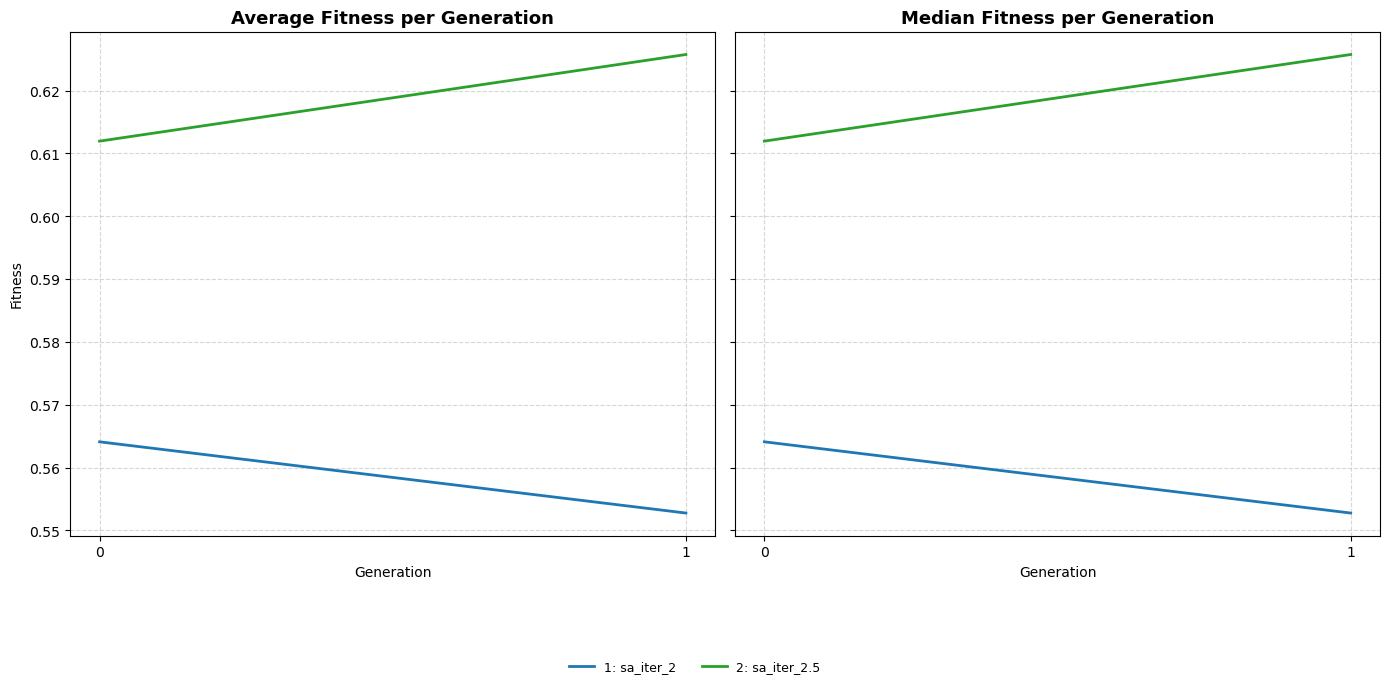

In [9]:
plot_avg_median_fit_per_generation(all_results=all_results_sa)

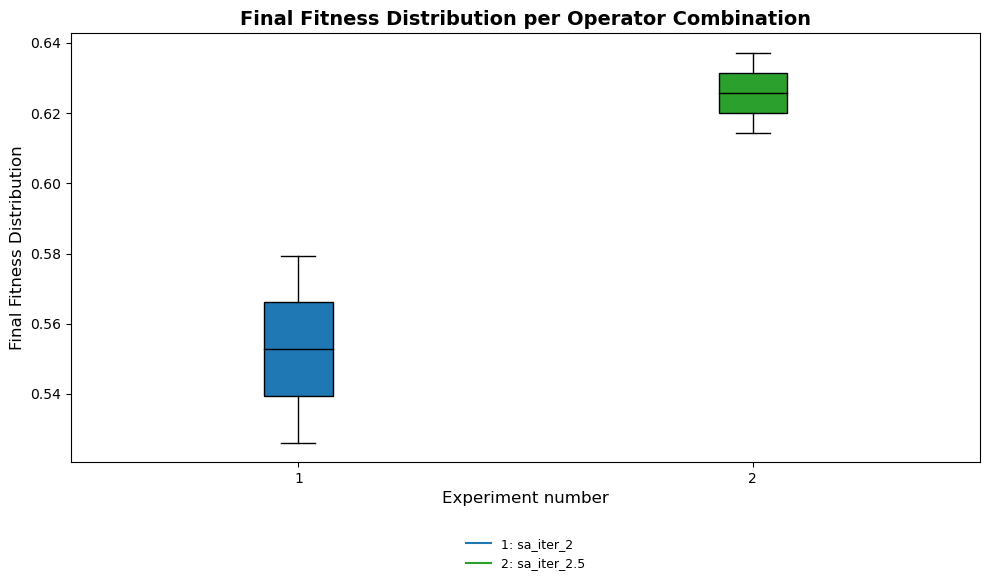

In [11]:
boxplots_final_fitness(all_results=all_results_sa)

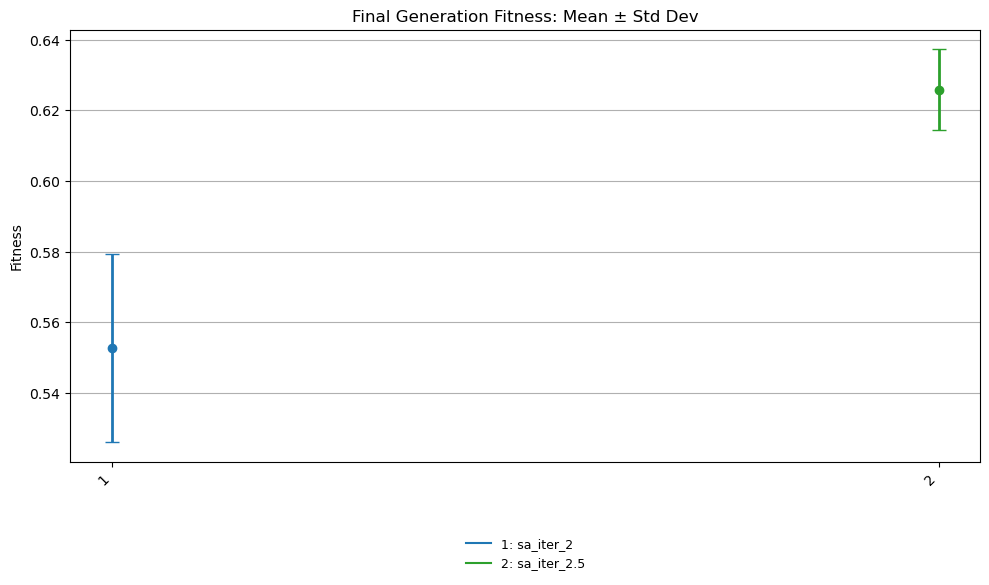

In [13]:
plot_mean_std_error(all_results=all_results_sa)

In [14]:
avg_elapsed_time_table(all_results=all_results_sa)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 6 elements

In [6]:
solution=LUSASolution()

In [7]:
solution.get_random_neighbor()

initial: [[7, 24, 3, 20, 34, 12, 2], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]
neighbor: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]


[[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]

In [27]:
solution_best=simulated_annealing(initial_solution=solution, C=4, L=20, H=30)

initial: [[7, 24, 3, 20, 34, 12, 2], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]
neighbor: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]
initial: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [32, 14, 16, 22, 23, 11, 31]]
neighbor: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [31, 32, 14, 16, 22, 23, 11]]
initial: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [31, 32, 14, 16, 22, 23, 11]]
neighbor: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 18, 6, 10, 26, 33, 5], [11, 31, 32, 14, 16, 22, 23]]
initial: [[2, 7, 24, 3, 20, 34, 12], [27, 30, 15, 1, 28, 8, 21], [9, 13, 29, 19, 25, 4, 17], [0, 

In [28]:
solution_best

([[2, 7, 24, 3, 20, 34, 12], [15, 1, 28, 8, 21, 27, 30], [13, 29, 19, 25, 4, 17, 9], [33, 5, 0, 18, 6, 10, 26], [23, 11, 31, 32, 14, 16, 22]],
 [0.605706276763579,
  0.5232091775702323,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478,
  0.6438814897412478])

In [33]:
initial_solution_sa_kap=LUKAPSASolution()
best_solution=simulated_annealing(initial_solution=initial_solution_sa_kap, C=2.5, H=50, L=50, max_iter=20)

In [34]:
best_solution

([[0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0]],
 [0.6005129853665605,
  0.5702152320943051,
  0.6504367720299862,
  0.6504367720299862,
  0.6504367720299862,
  0.6504367720299862,
  0.6504367720299862,
  0.6504367720299862,
  0.650436772029

# 5. Compare GA with SA